In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image # vscode에서 사진을 보여주기 위함이다.

In [235]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df.groupby(["pclass", "survived"])["survived"].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

In [12]:
df.groupby(["age", "survived"])["survived"].count()

age    survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: survived, Length: 142, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

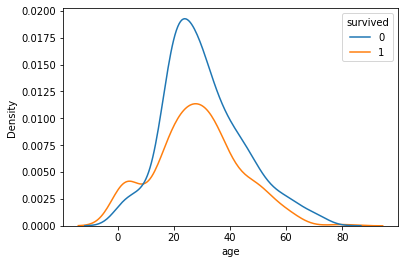

In [13]:
sns.kdeplot(data=df, x="age", hue="survived")

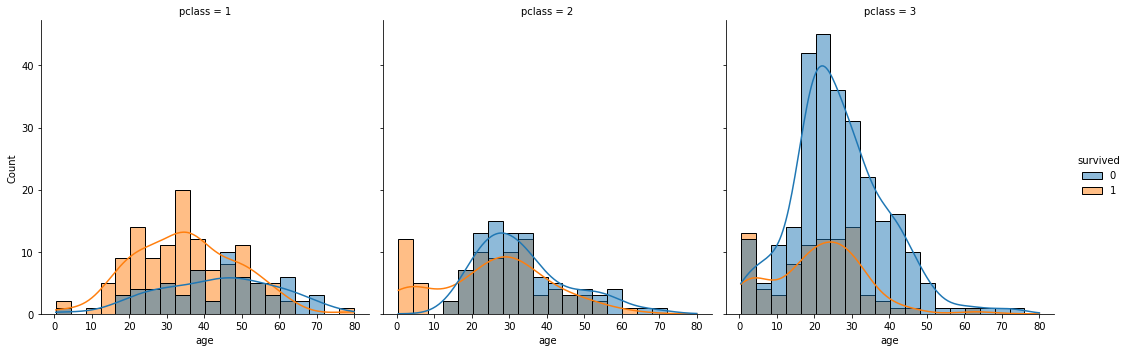

In [55]:
sns.displot(data=df, x="age", col="pclass", hue="survived", kde=True)
# 이 그래프가 관계성을 파악하기에는 가장 보기 좋은 그래프이다.
# 이 그래프를 통해서 확실하게 나이와 객실 등급에 따라 생존 여부가 달라짐을 알 수 있다. feature로 지정하기.

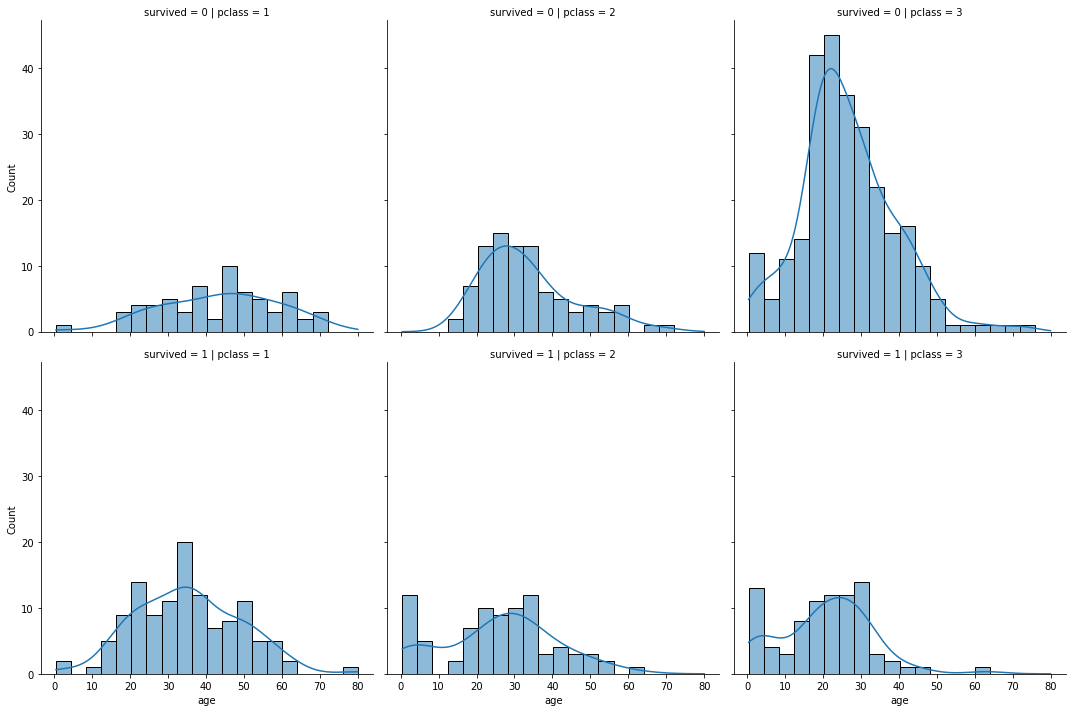

In [54]:
sns.displot(data=df, x="age", col="pclass", row="survived", kde=True)

c:\Users\ajouu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ajouu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ajouu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\ajouu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings

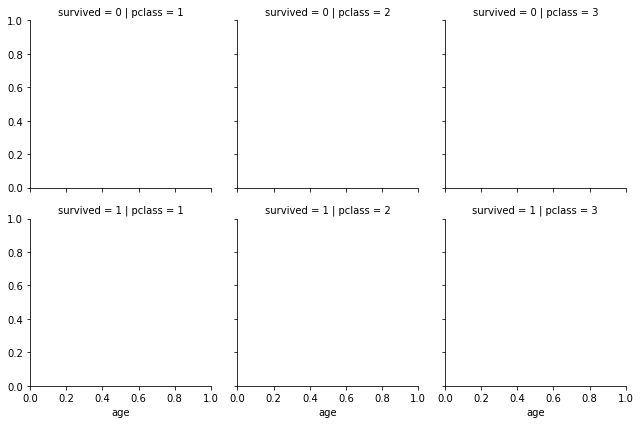

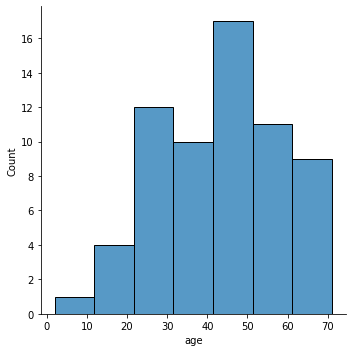

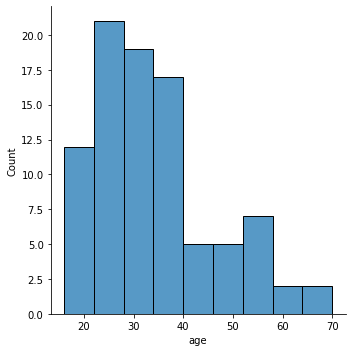

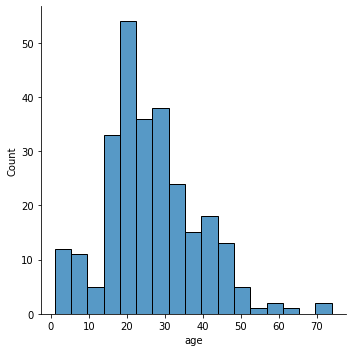

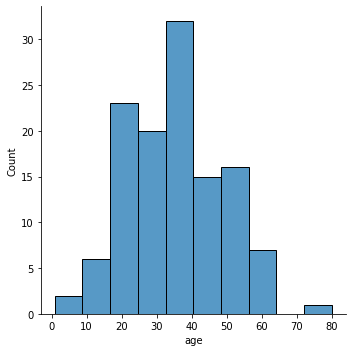

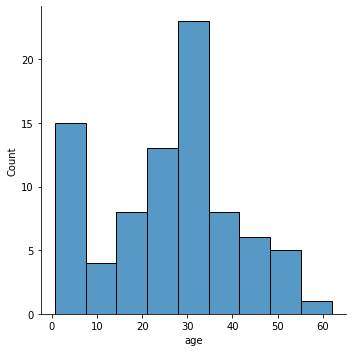

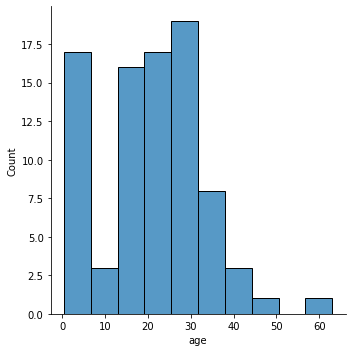

In [50]:
"""
chart=sns.FacetGrid(df, col="pclass", row="survived")
chart.map_dataframe(sns.displot, data=df, x="age")
chart.add_legend()  facetgrid legend
"""
# displot은 새로 나온 함수라서 그런지 따로 FacetGrid를 사용하지 않고, 그냥 parameter를 displot에 넣어주기.

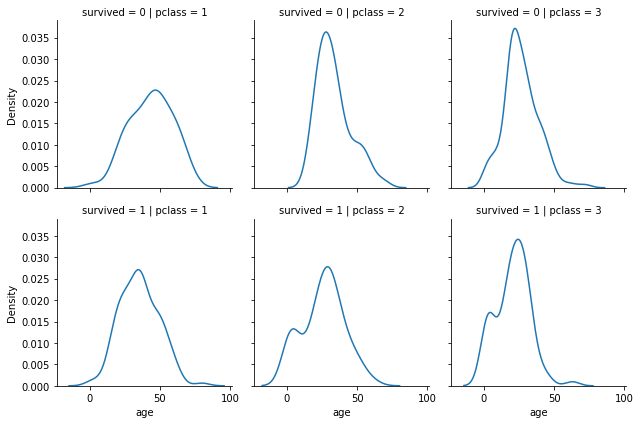

In [43]:
chart=sns.FacetGrid(df, col="pclass", row="survived")
chart.map_dataframe(sns.kdeplot, x="age")
# chart.add_legend() facetgrid legend
# 관계성을 보여준다. 나잇대마다 살아 남은 비율과 죽은 비율이 다르기 때문이다. feature로 설정할 수 있다. 

In [97]:
import copy # copy 불러오기.

In [98]:
df_copy=copy.deepcopy(df) # copy.deepcopy(df) 깊은 복사, copy.copy(df) 얕은 복사
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [91]:
# df, df_copy의 메모리 주소가 다름을 알 수 있다. (메모리 위치에 대한 식별자)
# 그래서 df_copy의 값을 변경해도, 원본 df는 문제가 되지 않는다.
print(id(df))
print(id(df_copy))

2373827293872
2373591887840


In [57]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [58]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [60]:
df.isnull().sum().sum() # 전체 결측치의 개수를 의미한다.

869

In [61]:
df.notnull().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [64]:
df.notnull().sum().sum()

12496

In [78]:
df.shape[0]*df.shape[1]

13365

In [79]:
df.shape[0]*df.shape[1]-df.notnull().sum().sum() # (dataframe의 values의 전체 개수) - (df 중에서 결측치가 아닌 값들의 개수) = (df에서의 결측치의 개수)

869

In [81]:
df.loc[df["age"].isnull()] # age가 결측치인 행들을 모두 가져왔다.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [82]:
df.loc[df["age"].notnull()] # age가 결측치가 아닌 행들을 모두 가져왔다.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 연습문제

In [114]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [129]:
df["age"].isnull().sum() # 177

177

In [130]:
df_copyDF=df.copy()
df["age"].isnull().sum() # 177

177

In [135]:
df_copyDF.loc[df_copyDF["age"].isnull(), "age"]=30

In [137]:
# 검증코드
# 본 Cell을 실행시 ERROR가 발생하지 않아야 함
assert df_copyDF['age'].isnull().sum() == 0
assert df_copyDF['age'].mean().round(4) == 29.7589

In [138]:
import copy

In [139]:
df_copy=copy.deepcopy(df_copy)

In [140]:
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [141]:
df_copy["age"].isnull().sum() # 0

0

In [142]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [146]:
df_copy=df.copy()
df_copy.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [148]:
df_copy["age"]=df_copy["age"].fillna(700)
df_copy.tail() # 700으로 채워졌다.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,700.0,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [149]:
sample = df.iloc[:10, :5].copy()
sample

,survived,pclass,sex,age,sibsp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0
5,0,3,male,NaN,0
6,0,1,male,54.0,0
7,0,3,male,2.0,3
8,1,3,female,27.0,0
9,1,2,female,14.0,1


In [150]:
np.arange(1, 9, 2)

array([1, 3, 5, 7])

In [151]:
sample.loc[np.arange(1, 9, 2), 'age'] = np.nan # loc 1,3,5,7의 위치는 np.nan으로 변경하기.
sample 

,survived,pclass,sex,age,sibsp
0,0,3,male,22.0,1
1,1,1,female,NaN,1
2,1,3,female,26.0,0
3,1,1,female,NaN,1
4,0,3,male,35.0,0
5,0,3,male,NaN,0
6,0,1,male,54.0,0
7,0,3,male,NaN,3
8,1,3,female,27.0,0
9,1,2,female,14.0,1


In [154]:
sample.fillna(method="ffill")

,survived,pclass,sex,age,sibsp
0,0,3,male,22.0,1
1,1,1,female,22.0,1
2,1,3,female,26.0,0
3,1,1,female,26.0,1
4,0,3,male,35.0,0
5,0,3,male,35.0,0
6,0,1,male,54.0,0
7,0,3,male,54.0,3
8,1,3,female,27.0,0
9,1,2,female,14.0,1


In [156]:
sample.fillna(method="bfill")

,survived,pclass,sex,age,sibsp
0,0,3,male,22.0,1
1,1,1,female,26.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0
5,0,3,male,54.0,0
6,0,1,male,54.0,0
7,0,3,male,27.0,3
8,1,3,female,27.0,0
9,1,2,female,14.0,1


In [157]:
df1=df.copy() # fillna 이용하기 위해서 df1을 하나 복사하여 이용하기.
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [159]:
df1["deck"]=df1["deck"].fillna("A")
df1["deck"].isnull().sum()

0

In [161]:
df1["deck"]

0      A
1      C
2      A
3      C
4      A
      ..
886    A
887    B
888    A
889    C
890    A
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [163]:
df1["pclass"].unique()

array([3, 1, 2], dtype=int64)

In [167]:
df1["deck"].dtypes

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False)

In [170]:
df1["pclass"]=df1["pclass"].astype("category")
df1["pclass"].dtypes # category로 데이터 타입을 변경할 수 있다.

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [175]:
df1['deck'].cat.add_categories('No Data') # deck column에 "No Data" column 추가 시키기.
# 뒤에 .fillna("No Data")를 붙여주면, 결측치에 "No Data"를 대입시킨다는 의미이다.

0      A
1      C
2      A
3      C
4      A
      ..
886    A
887    B
888    A
889    C
890    A
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'No Data']

In [185]:
df2=df.copy() # 통계값으로 채우기 위해서 새로운 dataframe을 복제해서 만들었다.
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [186]:
df2.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [187]:
df2["age"].fillna(df2["age"].mean()).tail()

886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, dtype: float64

In [188]:
df2["age"].fillna(df2["age"].median()).tail()

886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, dtype: float64

# 연습문제

In [253]:
df_copy=df.copy()
df_copy.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [254]:
male_meanAge=df_copy.loc[df_copy["sex"]=="male", "age"].mean()
male_meanAge # 남자 승객 나이 평균

30.72664459161148

In [255]:
female_meanAge=df_copy.loc[df_copy["sex"]=="female", "age"].mean()
female_meanAge # 여자 승객 나이 평균

27.915708812260537

In [256]:
df_copy["age"]=np.where(df_copy["sex"]=="male", male_meanAge, female_meanAge) # np.where(배열에 대한 조건문, 참일때 값, 거짓일때 값) : 삼항 조건 연산자
df_copy["age"].isnull().sum()
df_copy["age"].head(10)
# 결측치에 원하는 값 넣어주고 싶은 경우에 where 이용하면 원하는 값을 넣을 수 있다.

0    30.726645
1    27.915709
2    27.915709
3    27.915709
4    30.726645
5    30.726645
6    30.726645
7    30.726645
8    27.915709
9    27.915709
Name: age, dtype: float64

In [257]:
# 검증코드
# Cell 실행시 오류가 발생하지 않으면 PASS
assert (df_copy['age'].isnull().sum() == 0)
df_copy['age'].mean() # 정답 : 29.736034227171306
# 정답과 다르게 나왔는데, 왜 그렇게 나온지 잘 모르겠다.

29.73603422717131

In [258]:
df_copy=df.copy()
df_copy.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [259]:
man_meanAge=df_copy.loc[df_copy["who"]=="man", "age"].mean()
man_meanAge # 남자 승객 나이 평균

33.17312348668281

In [260]:
woman_meanAge=df_copy.loc[df_copy["who"]=="woman", "age"].mean()
woman_meanAge # 여자 승객 나이 평균

32.0

In [261]:
df_copy["age"]=np.where(df_copy["who"]=="man", man_meanAge, woman_meanAge) # np.where(배열에 대한 조건문, 참일때 값, 거짓일때 값) : 삼항 조건 연산자
df_copy["age"].isnull().sum()
df_copy["age"].head(10)
# 결측치에 원하는 값 넣어주고 싶은 경우에 where 이용하면 원하는 값을 넣을 수 있다.

0    33.173123
1    32.000000
2    32.000000
3    32.000000
4    33.173123
5    33.173123
6    33.173123
7    32.000000
8    32.000000
9    32.000000
Name: age, dtype: float64

In [262]:
# 검증코드
# Cell 실행시 오류가 발생하지 않으면 PASS
assert (df_copy['age'].isnull().sum() == 0)
df_copy['age'].mean() # 정답 : 29.736034227171306
# 정답과 다르게 나왔는데, 왜 그렇게 나온지 잘 모르겠다.

32.70703402059335